In [1]:
!pip3 install --user opencv-python

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as sk
import skimage.io as skio
import cv2
from itertools import product

## Input Files

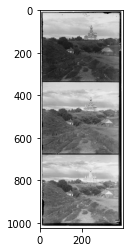

In [119]:
input_file = 'data/cathedral.jpg'
im = cv2.imread(input_file, cv2.IMREAD_GRAYSCALE)
plt.imshow(im, cmap=plt.get_cmap('gray'))

In [120]:
print(im.shape)
im_num_rows = im.shape[0]
im_num_co1s = im.shape[1]

(1024, 390)


# Aligning Channels

In [234]:
def sub_image(im, start, h, w, r_shift=0, c_shift=0):
    result = np.zeros(h - 2*r_shift, w - 2*c_shift)
    a = im[start[0]+r_shift : start[0]+h-r_shift, start[1]+c_shift : start[1]+w-c_shift]
    result[:a.shape[0], :a.shape[1]] = a
    return result

### Alignment Algorithms

In [242]:
h = im.shape[0]//3
w = im.shape[1]
print(im.shape)
b = (0, 0)
#print(b)
print(sub_image(im, b, h, w).shape)
print(sub_image(im, b, h, w, 5, 5).shape)

(1024, 390)
(341, 390)
(331, 380)


In [241]:
dx, dy = 15, 2
other = (dx,dy)
#print(other)
print(sub_image(im, b, h, w).shape)
print(sub_image(im, other, h, w, 5, 5).shape)

(341, 390)
(331, 380)


In [263]:
# return alignment index by simply dividing the image in 3
def basic(im):
    num_rows = im.shape[0]
    B_start = [0,0]
    G_start = [num_rows//3,0] # floor division to get integer indices
    R_start = [num_rows//3*2,0]
    height = im.shape[0]//3
    width = im.shape[1]
    return B_start, G_start, R_start, height, width

In [264]:
def display_result(B_start, G_start, R_start, channel_height, channel_width):
    # create channel matricies
    B_mat = im[B_start[0]:B_start[0]+channel_height, B_start[1]:B_start[1]+channel_width]
    G_mat = im[G_start[0]:G_start[0]+channel_height, G_start[1]:G_start[1]+channel_width]
    R_mat = im[R_start[0]:R_start[0]+channel_height, R_start[1]:R_start[1]+channel_width]
    
    result = cv2.merge((B_mat, G_mat, R_mat))
    plt.imshow(result)

[0, 0] [341, 0] [682, 0]
341 390


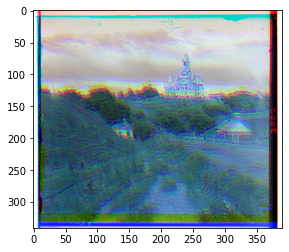

In [265]:
B_start, G_start, R_start, channel_height, channel_width = basic(im)
print(B_start, G_start, R_start)
print(channel_height, channel_width)
display_result(B_start, G_start, R_start, channel_height, channel_width)

## Adjustments

In [267]:
# normalize exposures
# takes in a matrix with values within [1,0], 
# and transforms it so that the minimum value becomes 0, maximum value becomes 1
def fix_exposure(mat):
    unit_len = np.amax(mat) - np.amin(mat)
    mat = (mat - np.amin(mat))/unit_len

In [269]:
def adjust(B_mat, G_mat, R_mat):
    fix_exposure(B_mat)
    fix_exposure(G_mat)
    fix_exposure(R_mat)
    
adjust(B_mat, G_mat, R_mat)